In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole

In [2]:
from psikit import Psikit

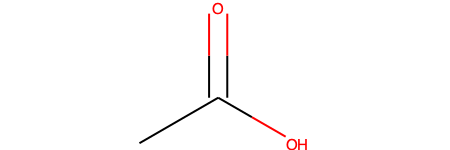

In [3]:
smi = 'CC(=O)O'
mol = Chem.MolFromSmiles(smi)
AllChem.Compute2DCoords(mol)
mol

In [4]:
# load smiles and perform optimzation
pk = Psikit()
pk.read_from_smiles(smi)
%time pk.optimize()

Optimizer: Optimization complete!
CPU times: user 21.6 s, sys: 920 ms, total: 22.5 s
Wall time: 6.23 s


-227.82082530474275

In [5]:
print('{} HOMO'.format(pk.HOMO))
print('{} LUMO'.format(pk.LUMO))

-0.4475250945589174 HOMO
0.19145180576316892 LUMO


In [6]:
# Get Atoms from pk.mol object and check atom properties
atoms = pk.mol.GetAtoms()
print(list(atoms[0].GetPropNames()))

[]


In [7]:
charges = pk.resp_charge

In [8]:
atoms = pk.mol.GetAtoms()
print(list(atoms[0].GetPropNames()))

['EP_C', 'RESP_C']


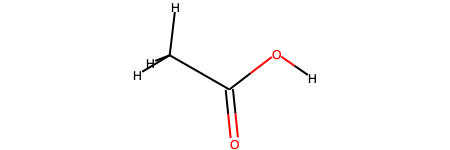

In [9]:
pk.mol

In [10]:
from rdkit.Chem.Draw import MolDrawOptions
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

In [11]:
view = rdMolDraw2D.MolDraw2DSVG(600,800)
op = view.drawOptions()
for idx, atom in enumerate(pk.mol.GetAtoms()):
    num = float(atom.GetProp('RESP_C'))
    op.atomLabels[idx] = "{}({:,.2f})".format(atom.GetSymbol(), num)
AllChem.Compute2DCoords(pk.mol)
view.DrawMolecule(pk.mol)
view.FinishDrawing()

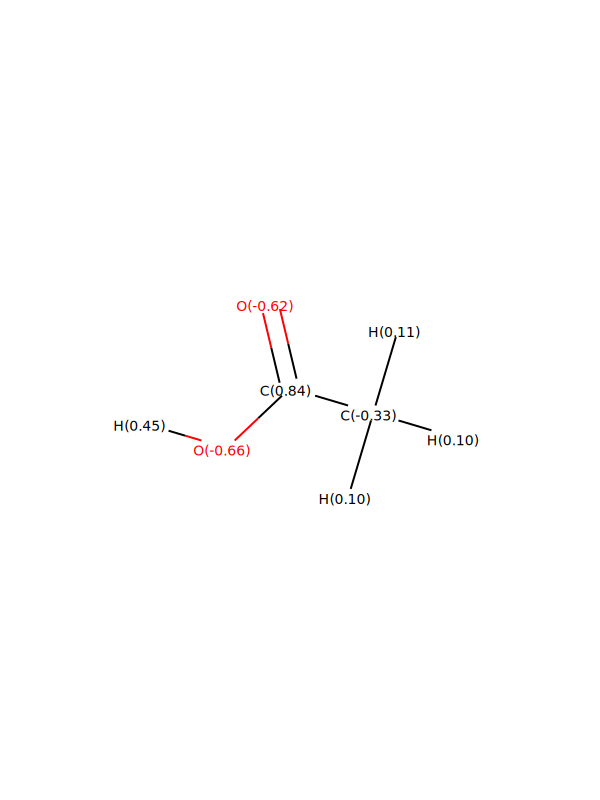

In [12]:
svg = view.GetDrawingText().replace('svg:', '')
SVG(svg)